# Merge Sort Algorithm
(invented by John von Neumann in 1945)
    
Purpose of algorithm is to sort an unsorted array of number in increasing order. The sorting is done recursively followed by merging. The steps involved are:

- Step 1: Split the array recursively till list has only one element
- Step 2: In order to merge the routine, traverse the two sorted sub-array and compare the individual elements and append the smaller element to the output array. Increment the index of the sub-array from which element has been appended. 
- Step 3: When one of the sub-array is exhausted, append the remaining of second sorted sub-array to the output array and return.

In essence, this requires two recursive calls. First we recursively split the array till we end up with sub-arrays of one element each. Next we merge the sub-arrays by comparing the individual elements and sorting them in output array till we have sorted the entire input array.

## Pseudocode for merge 
(Source: Tim Roughneck, Stanford)

C= output [length =n]
A = 1st sorted sub array [n/2]
B = 2nd sorted sub array [n/2]
i = 0
j = 0

$\qquad$ for k =1 to n <br>
$\qquad$ $\qquad$ if A(i) <= B(j) <br>
$\qquad$ $\qquad$ $\qquad$ C(k) =A(i) <br>
$\qquad$ $\qquad$ $\qquad$  i++ <br>
$\qquad$ $\qquad$ else if A(i) > B(j) <br>
$\qquad$ $\qquad$ $\qquad$ C(k) = B(j) <br>
$\qquad$ $\qquad$ $\qquad$ j++ <br>

 
## Time Complexity
(Source: Tim Roughneck, Stanford)

### For pseudocode merge:
For each iteration of For loop, we have 4 operations => $4m$ operations where $m$ is the size of array at iteration level.
Running time for merge subroutine  = $4m +2$ (2 assignment operations). This doesn't count the two operations of comparing the dummy variables with upperbound of subarray. So technically it will be $6m+2$ operations. 

### For merge-sort part
To understand the number of operations in merge-sort (or divide conquer) algorithm consider the figure below. It is n dimensional array at root. The base is at level $log_2n$. So total number of levels is $log_2n + 1$ (including root level 0). 

The $jth$ level has $2^j$ subproblems (as number of problems are doubling at each level) each of size $n/2^j$ (as problem halves at each iteration).

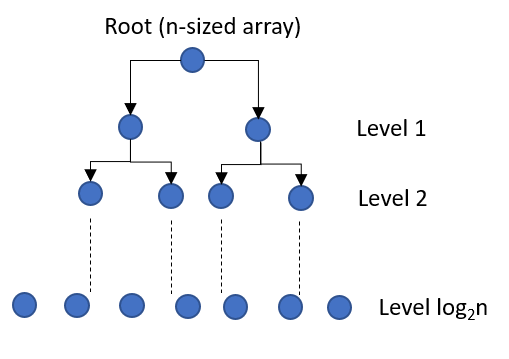

At each level of the merge-sort the only operation apart from recursive calls that gets called is merge. The merge algorithm execute $6m$ operations where $m$ is the size of array at iteration level. So at level j, when it will solve $2^j$ subproblems of size $n/2^j$ where $n$ is size of original array,  it will execute $2^j * (6*n/2^j)$ operations (ignoring constant factor). Cancelling out the terms we get $6n$ terms(This is due to balancing act of doubling of subproblems and halving of size of subproblems).

As discussed, there are $(log_2n +1) * 6n$ operations executed. The recursive part of mergesort executes $6n log_2(n) +6n$ operations. 

This means the time complexity of merge-sort is $O(nlog_2n)$

In [74]:
import pandas as pd
import numpy as np

In [83]:
def split_array(lst):
    # Splits the array lst in two halves a,b 
    n = len(lst)
    lst1 = lst[0:int(n//2)]
    lst2 = lst[int(n//2)::]
    return lst1,lst2

In [89]:
def merge(lst1, lst2):
    # subroutine to merge two lists in one sorted list
    
    # The length of output list will be equal to lengths of two lists
    n1= len(lst1)
    n2 = len(lst2)
    n=n1+n2
    lst = []
    i =0
    j =0
    
    
    for k in range(n):
        # if one of the list ends, concatenate the remaining second list to end of output list
        # Since we are merging each list after sorting in merge-sort, both list indivudally will already be sorted
        # The merge routine runs till one of the list is exhausted
        if i == n1: return lst+lst2[j::]
        if j == n2: return lst+lst1[i::]
        
        # Sorting if both list length > 0 
        # We compare individual element of one sorted list with other, 
        # if its smaller or equal to the element of second sorted list, we concatenate the output list with this 
        # element and increase the counter of the list by one 
        if lst1[i] <= lst2[j]:
            lst.append(lst1[i])
            i+=1
            
        elif lst1[i] > lst2[j]:
            lst.append(lst2[j])
            j+=1
           


In [90]:
# Test
lst1 = [1,4,8]
lst2 = [3,6,9]
print(merge(lst1,lst2))

[1, 3, 4, 6, 8, 9]


In [91]:
def merge_sort(lst):
    # Subroutine to recursively split (using merge_sort call) and merging the list after sorting (using merge call)
    n = len(lst)
    
    if n==1:
        return lst
    # Base case for recursion routine. If n =1, or list is down to its last element, we return the list
    # The sorting and merging of element starts once all the sub list are reduced to one element array.
    
    else:
        lst1, lst2 =split_array(lst)
        return merge(merge_sort(lst1),merge_sort(lst2))


In [92]:
# test
print(merge_sort([4,2,1,8,5]))

[1, 2, 4, 5, 8]


In [93]:
# Test the merge_sort routine

from nose.tools import assert_equal

class test_mergesort(object):
    
    def testing(self,sol):
        assert_equal(sol([4,5,2,3,9]),[2,3,4,5,9])
        assert_equal(sol([40, 10, 3, 100, 45]),[3,10,40,45,100])
        
        print('All test passed')

t1 = test_mergesort()
t1.testing(merge_sort)

All test passed
